# MSADS 508 CyberSentinel Security Solutions
## Data Exploration

In [2]:
%store -r ingest_create_athena_table_csv_passed
!pip install --disable-pip-version-check -q PyAthena==2.1.0

In [4]:
try:
    ingest_create_athena_table_csv_passed
except NameError:
    print("++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL PREVIOUS NOTEBOOKS.  You did not convert into Parquet data.")
    print("++++++++++++++++++++++++++++++++++++++++++++++")

In [6]:
print(ingest_create_athena_table_csv_passed)

True


In [7]:
if not ingest_create_athena_table_csv_passed:
    print("++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL PREVIOUS NOTEBOOKS.  You did not convert into Parquet data.")
    print("++++++++++++++++++++++++++++++++++++++++++++++")
else:
    print("[OK]")

[OK]


In [9]:
!pip install --upgrade numpy pandas matplotlib seaborn boto3 sagemaker
import boto3
import sagemaker

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 155.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 161.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 209.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 95.3 MB/s eta 0:00:00
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 5.3.1
    Uninstalling PyYAML-5.3.1:
      Successfully uninstalled PyYAML-5.3.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
  Attempting uninstall: botocore
    Found existing installation: botocore 1.19.56
    Uninstalling botocore-1.19.56:
      Successfully uninstalled botocore-1.19.56
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
  Attempting uninstall: s3transfer
   

/opt/conda/lib/python3.11/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


[03/17/25 05:01:02] INFO     generated new fontManager                                         ]8;id=461825;file:///opt/conda/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=50070;file:///opt/conda/lib/python3.11/site-packages/matplotlib/font_manager.py#1639\1639]8;;\

In [10]:
import sagemaker
import boto3

sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

In [21]:
# Set Athena database & table
database_name = "cybersentinel"
table_name = "cyber_sentinel_security_csv"

In [12]:
from pyathena import connect

In [13]:
# Set S3 staging directory -- this is a temporary directory used for Athena queries
s3_staging_dir = "s3://{0}/athena/staging".format(bucket)

In [14]:
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [15]:
sns.set_style = "seaborn-whitegrid"

sns.set(
    rc={
        "font.style": "normal",
        "axes.facecolor": "white",
        "grid.color": ".8",
        "grid.linestyle": "-",
        "figure.facecolor": "white",
        "figure.titlesize": 20,
        "text.color": "black",
        "xtick.color": "black",
        "ytick.color": "black",
        "axes.labelcolor": "black",
        "axes.grid": True,
        "axes.labelsize": 10,
        "xtick.labelsize": 10,
        "font.size": 10,
        "ytick.labelsize": 10,
    }
)

In [16]:
def show_values_barplot(axs, space):
    def _show_on_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            value = round(float(p.get_width()), 2)
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_plot(ax)
    else:
        _show_on_plot(axs)

In [26]:
# SQL statement
statement = """
SELECT label, AVG(flow_duration) AS avg_flow_duration
FROM {}.{}
GROUP BY label
ORDER BY avg_flow_duration
""".format(
    database_name, table_name
)

print(statement)


SELECT label, AVG(flow_duration) AS avg_flow_duration
FROM cybersentinel.cyber_sentinel_security_csv
GROUP BY label
ORDER BY avg_flow_duration



In [27]:
import pandas as pd

df = pd.read_sql(statement, conn)
df.head(5)

/tmp/ipykernel_11127/2726024186.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(statement, conn)


,label,avg_flow_duration
0,ddos,3231011.8
1,benign,10009866.0


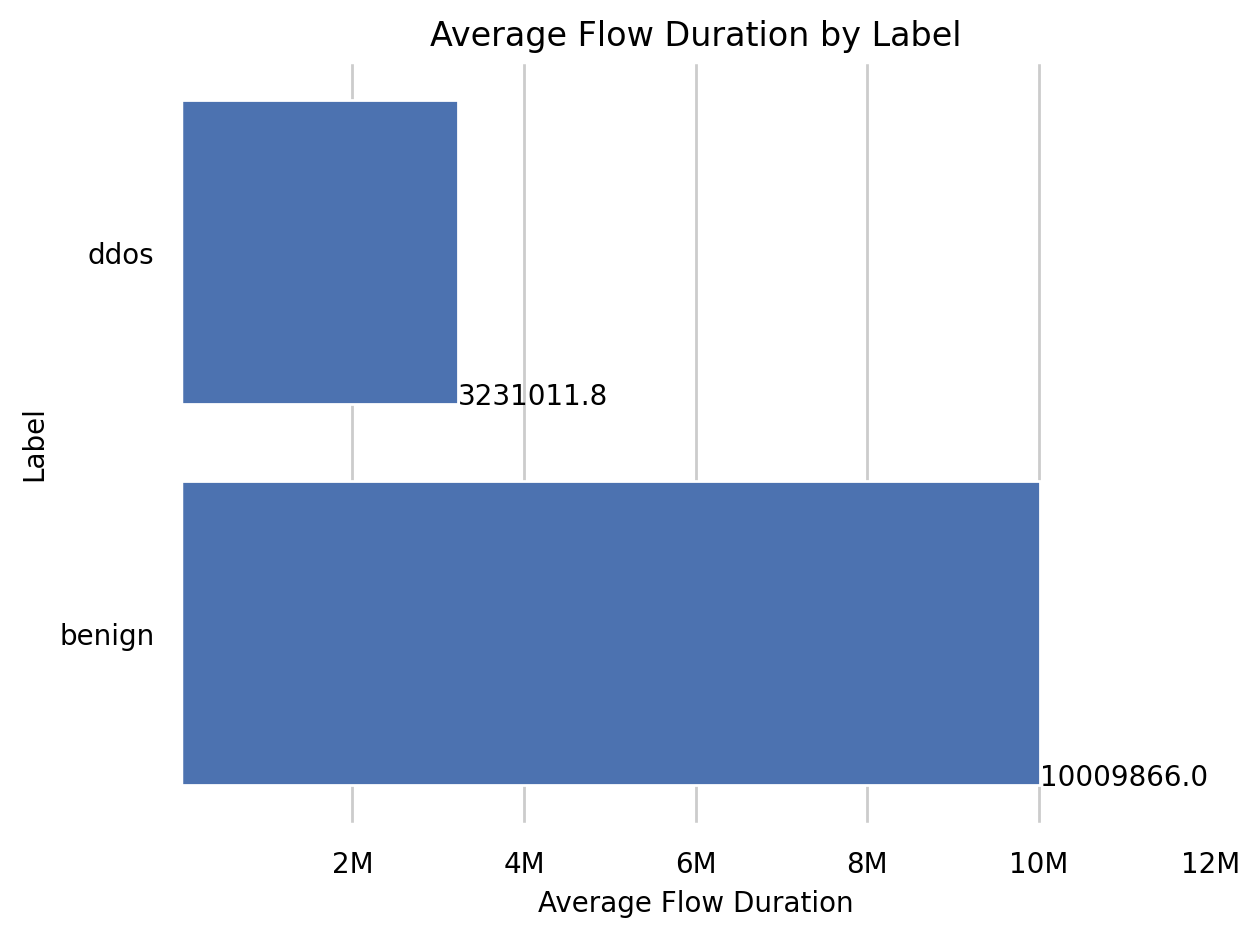

In [28]:
# Create plot
barplot = sns.barplot(y = "label", x = "avg_flow_duration", data = df, saturation = 1)

plt.title("Average Flow Duration by Label")
plt.xticks([2000000, 4000000, 6000000, 8000000, 10000000, 12000000], ["2M", "4M", "6M", "8M", "10M", "12M"])

show_values_barplot(barplot, 0.1)

plt.xlabel("Average Flow Duration")
plt.ylabel("Label")

plt.tight_layout()

plt.show(barplot)